In [ ]:
from google.colab import drive
drive.mount ('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import os 
os.chdir('/gdrive/My Drive/')

In [2]:
import pandas as pd # manipulate your data
D = pd.read_csv("Iris.csv", index_col=0)
print(f"Data has {D.shape[0]} rows and {D.shape[1]} columns.\n")
D.head()

Data has 150 rows and 5 columns.



SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa

In [3]:
df=D.rename(columns={'SepalLengthCm': 'SepalLength', 'SepalWidthCm': 'SepalWidth','PetalLengthCm':'PetalLength', 'PetalWidthCm':'PetalWidth'})
df.replace({'Iris-setosa': '1', 'Iris-versicolor': '2', 'Iris-virginica': '3'},inplace=True)
df.head()

SepalLength  SepalWidth  PetalLength  PetalWidth Species
Id                                                          
1           5.1         3.5          1.4         0.2       1
2           4.9         3.0          1.4         0.2       1
3           4.7         3.2          1.3         0.2       1
4           4.6         3.1          1.5         0.2       1
5           5.0         3.6          1.4         0.2       1

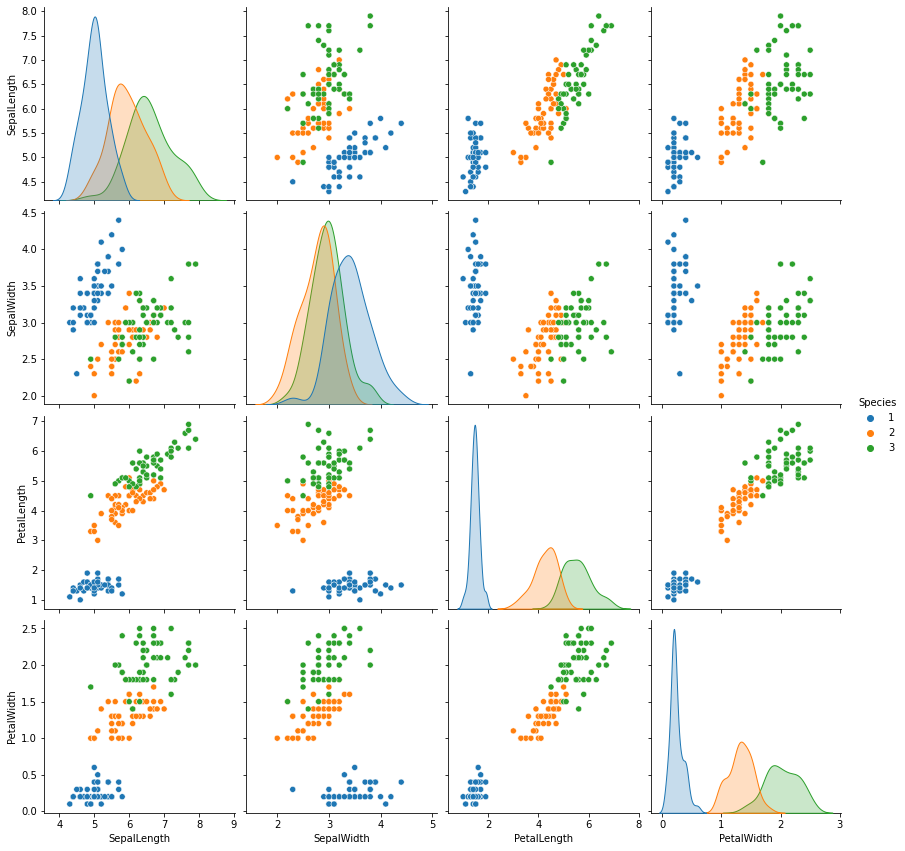

In [4]:
import seaborn as sns
sns.pairplot(df,hue='Species',height=3)

In [5]:
df1=df.drop(['SepalLength', 'SepalWidth', 'Species'], axis=1)
df1.head()

PetalLength  PetalWidth
Id                         
1           1.4         0.2
2           1.4         0.2
3           1.3         0.2
4           1.5         0.2
5           1.4         0.2

In [6]:
X=df1.to_numpy()
X.shape

(150, 2)

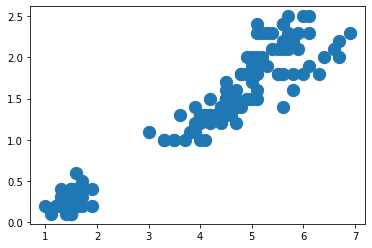

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], s=150);

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

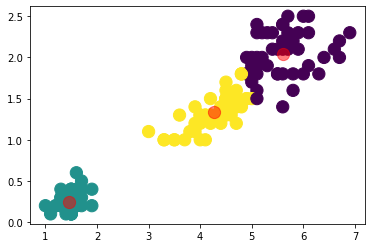

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=150, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, alpha=0.5);

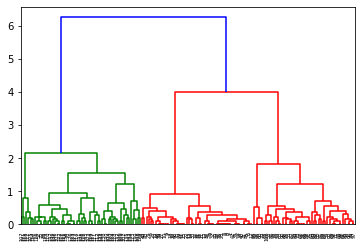

In [10]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='complete')) # A dendrogram is a tree-like diagram that records the sequences of merges or splits

In [11]:
from sklearn.cluster import AgglomerativeClustering
Agglclustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')# we can take n_clusters with any threshould
Agglclustering.fit(X)
labels = Agglclustering.labels_

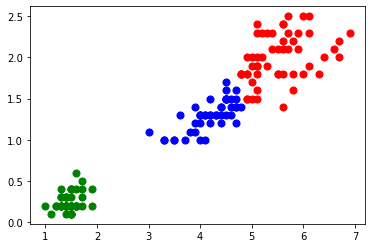

In [12]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')

### Agglomerative Clustering: 
1. Assign each data points to a separate cluster
1. Based on the similarity of clusters, combine the most similar clusters together 
  * Compute the distance matrix
  * Use linkage criteria to merge the clusters
  * Update the distance matrix

1. Repeat step 2 until only a single cluster is left
1. In this way we build a hierarchy of clusters

### Advantage: No need to decide no. of cluster at initial level
### Disadvantage: Computation complexity is more

### Examaple:

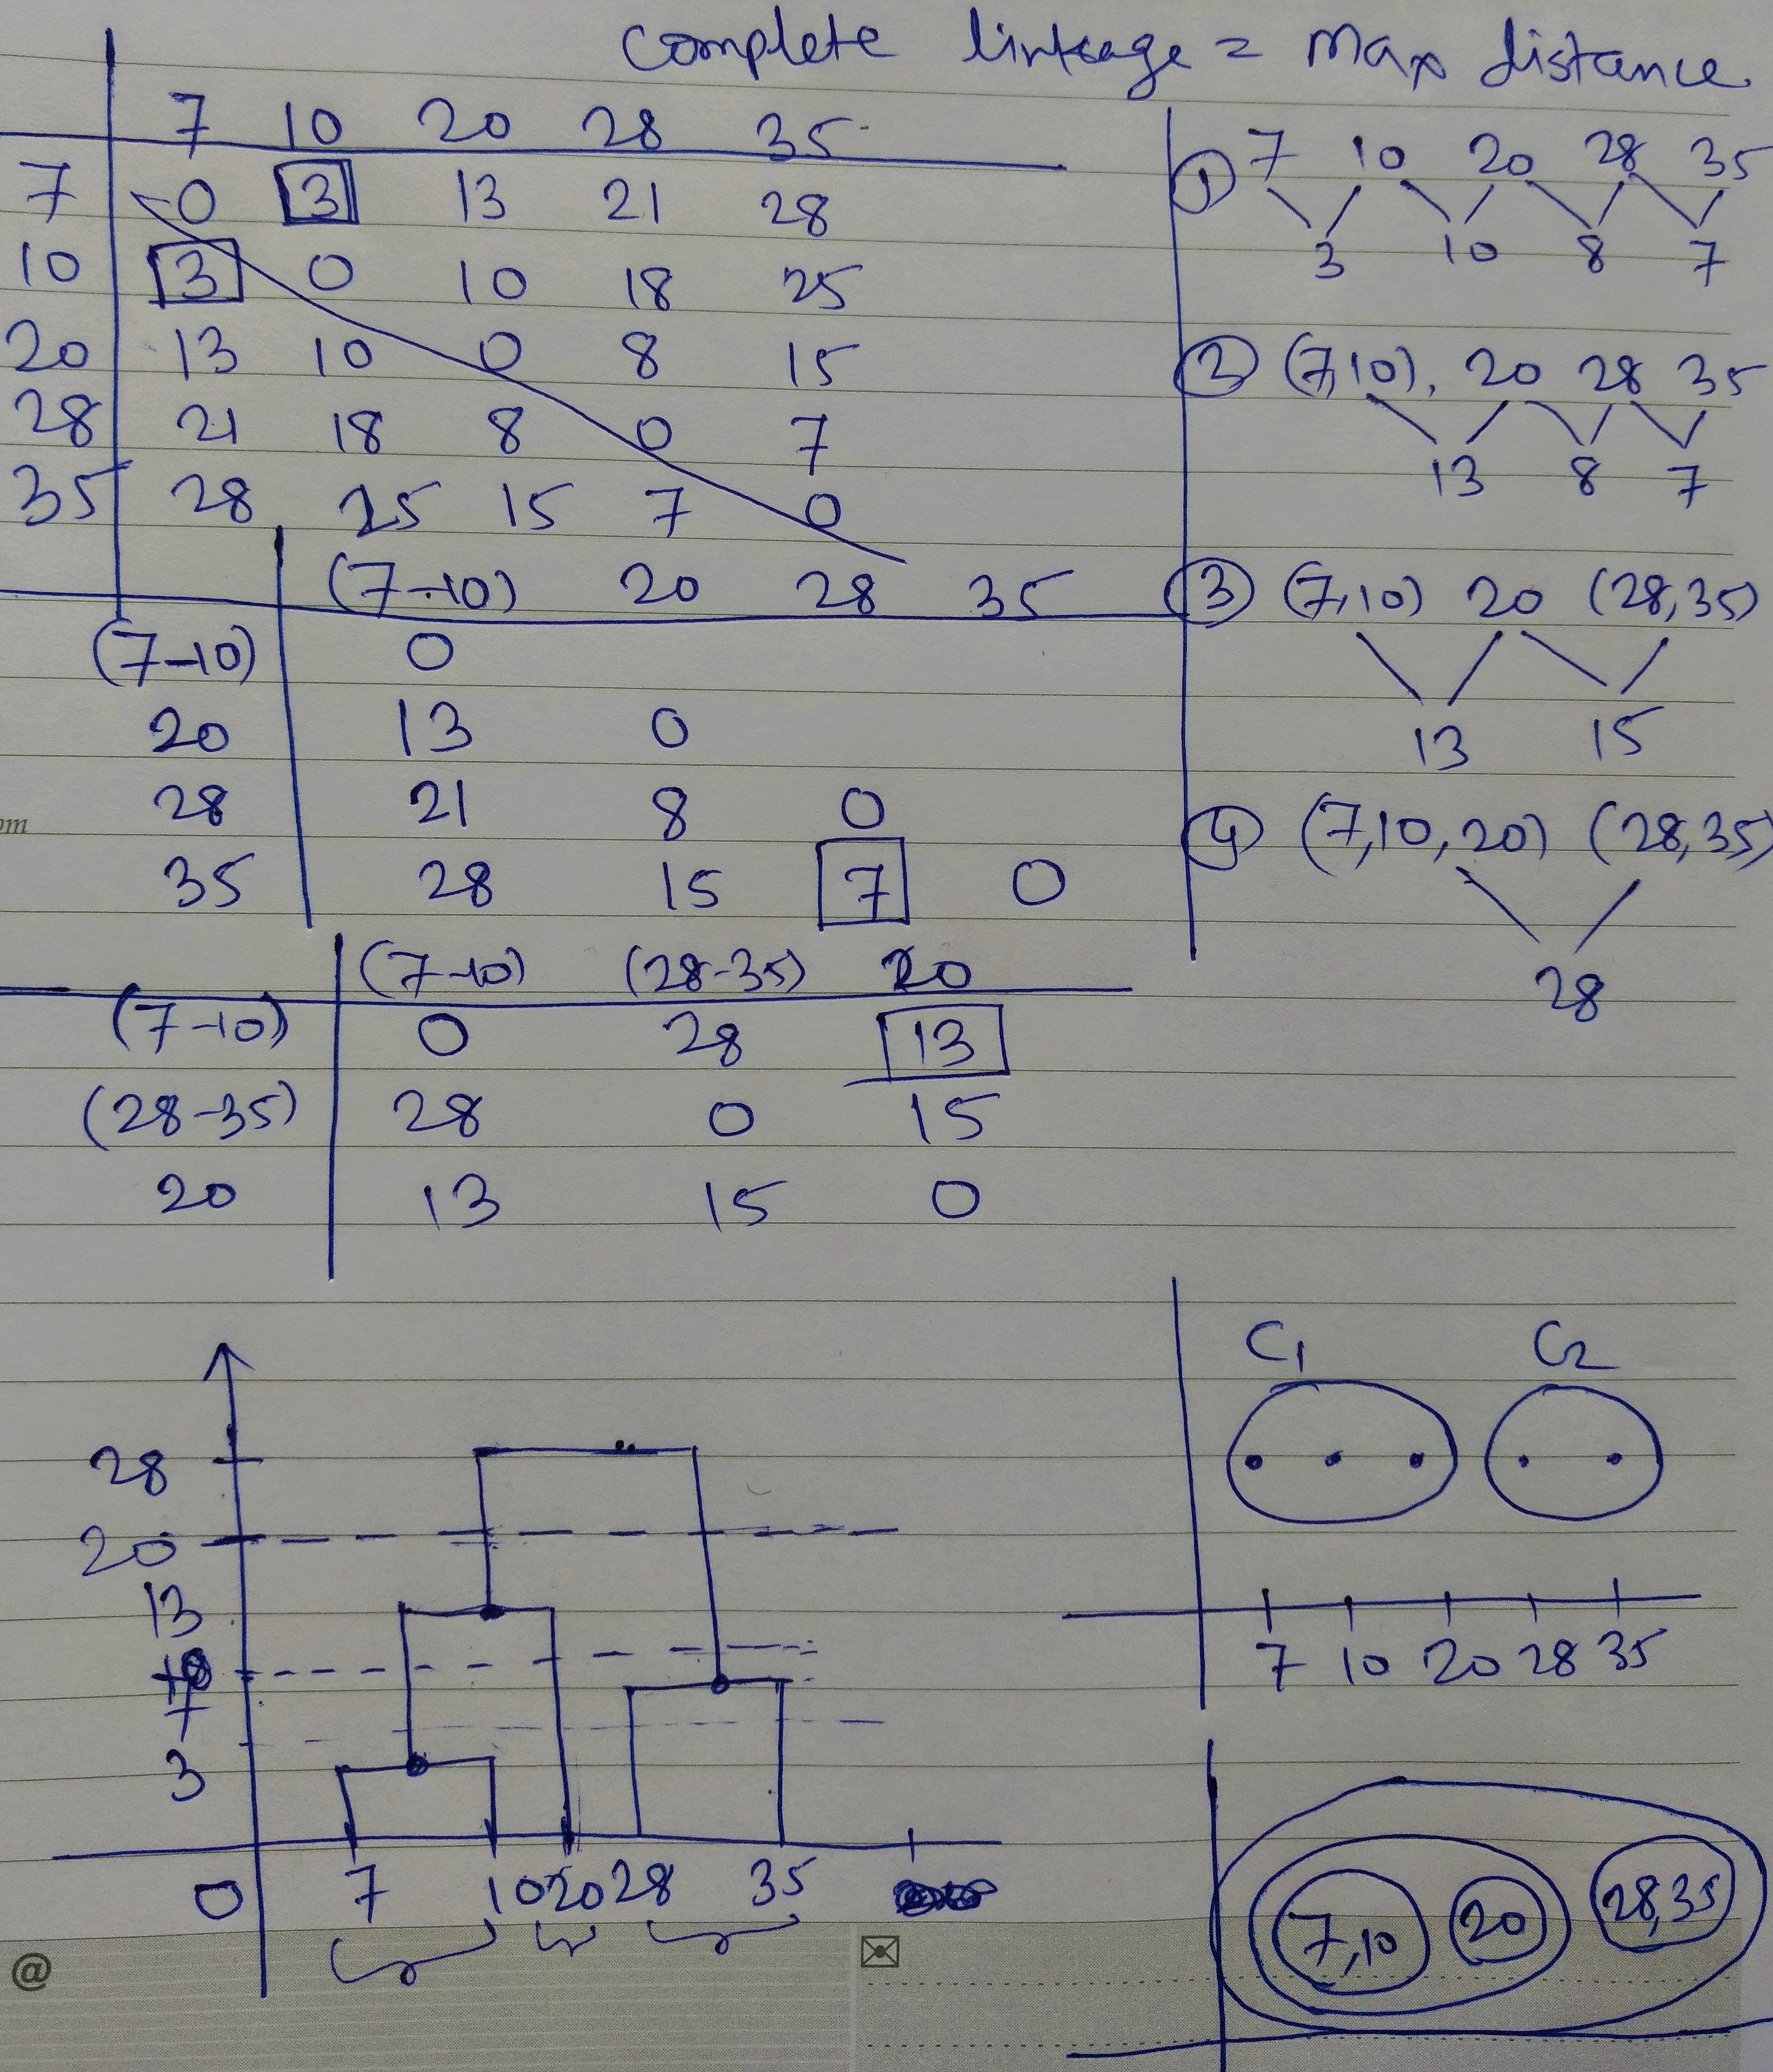

### Numerical:
Question: Form Three clusters for the givin data using Agglomerative clustering method.

Data points co-ordinates(x,y): A1(2, 10), A2(2, 5), A3(8, 4), A4(5, 8), A5(7, 5), A6(6, 4), A7(1, 2), A8(4, 9) 



In [13]:
import numpy as np
# data points
A1=np.array([2,10]); A2=np.array([2,5]);A3=np.array([8,4]);A4=np.array([5,8]);A5=np.array([7,5])
A6=np.array([6,4]);A7=np.array([1,2]);A8=np.array([4,9])


[[ 2 10]
 [ 2  5]
 [ 8  4]
 [ 5  8]
 [ 7  5]
 [ 6  4]
 [ 1  2]
 [ 4  9]]


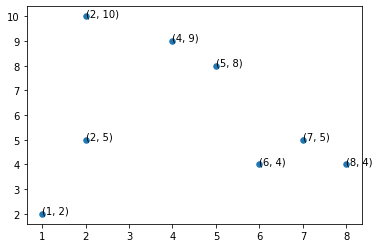

In [14]:

%matplotlib inline
import matplotlib.pyplot as plt

X=np.vstack((A1, A2,A3,A4,A5,A6,A7,A8))
print(X)
plt.scatter(X[:, 0], X[:, 1], s=30 )
for xy in zip(X[:, 0], X[:, 1]):                                      
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')  
plt.show()



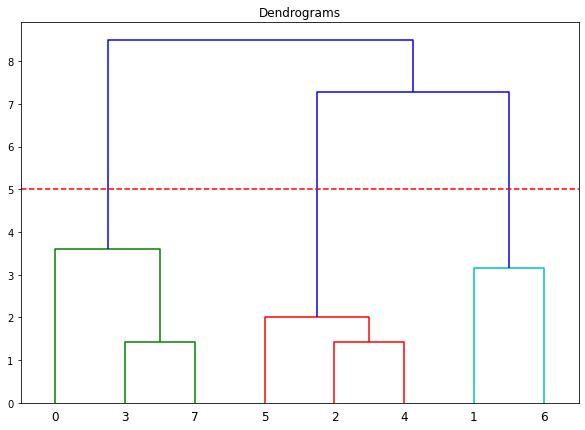

In [15]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms") 
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))#complete,average,ward
plt.axhline(y=5, color='r', linestyle='--')
#plt.axhline(y=2.5, color='r', linestyle='--')

In [16]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
model.fit(X)
labels = model.labels_

In [17]:
from scipy.cluster.hierarchy import linkage
Z = linkage(X, method='complete')
print(Z)

[[ 3.          7.          1.41421356  2.        ]
 [ 2.          4.          1.41421356  2.        ]
 [ 5.          9.          2.          3.        ]
 [ 1.          6.          3.16227766  2.        ]
 [ 0.          8.          3.60555128  3.        ]
 [10.         11.          7.28010989  5.        ]
 [12.         13.          8.48528137  8.        ]]


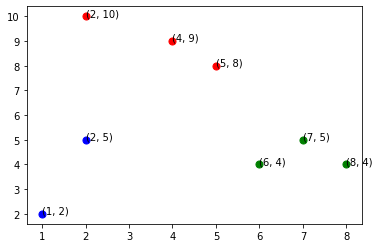

In [18]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
for xy in zip(X[:, 0], X[:, 1]):                                      
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')  
plt.show()

In [19]:
from scipy.spatial import distance_matrix

Q=distance_matrix(X,X)
print(Q)

[[0.         5.         8.48528137 3.60555128 7.07106781 7.21110255
  8.06225775 2.23606798]
 [5.         0.         6.08276253 4.24264069 5.         4.12310563
  3.16227766 4.47213595]
 [8.48528137 6.08276253 0.         5.         1.41421356 2.
  7.28010989 6.40312424]
 [3.60555128 4.24264069 5.         0.         3.60555128 4.12310563
  7.21110255 1.41421356]
 [7.07106781 5.         1.41421356 3.60555128 0.         1.41421356
  6.70820393 5.        ]
 [7.21110255 4.12310563 2.         4.12310563 1.41421356 0.
  5.38516481 5.38516481]
 [8.06225775 3.16227766 7.28010989 7.21110255 6.70820393 5.38516481
  0.         7.61577311]
 [2.23606798 4.47213595 6.40312424 1.41421356 5.         5.38516481
  7.61577311 0.        ]]


In [20]:
df3 = pd.DataFrame(Q, index = ['A1', 'A2', 'A3', 'A4', 'A5','A6','A7','A8'], columns =['A1', 'A2', 'A3', 'A4', 'A5','A6','A7','A8'])
df3

A1        A2        A3  ...        A6        A7        A8
A1  0.000000  5.000000  8.485281  ...  7.211103  8.062258  2.236068
A2  5.000000  0.000000  6.082763  ...  4.123106  3.162278  4.472136
A3  8.485281  6.082763  0.000000  ...  2.000000  7.280110  6.403124
A4  3.605551  4.242641  5.000000  ...  4.123106  7.211103  1.414214
A5  7.071068  5.000000  1.414214  ...  1.414214  6.708204  5.000000
A6  7.211103  4.123106  2.000000  ...  0.000000  5.385165  5.385165
A7  8.062258  3.162278  7.280110  ...  5.385165  0.000000  7.615773
A8  2.236068  4.472136  6.403124  ...  5.385165  7.615773  0.000000

[8 rows x 8 columns]